# IMU + GPS noise analysis

This notebook investigates the noise of IMU + GPS data collected whilst the device was stationary for a period of time.

In [1]:
# Imports
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Local functions
sys.path.append("..") 
from imu.plotting import *

In [2]:
# Load data
session_uuid = "2ac38da9-c8bc-4227-974a-bbe242006df4"

# IMU data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_imu_data_processed = parent_path + "/datasets/" + "session-" + session_uuid + "/imu_data/processed/"

timestamp = pd.read_csv(path_to_imu_data_processed + "timestamp.csv")
attitude = pd.read_csv(path_to_imu_data_processed + "attitude.csv")
gravity = pd.read_csv(path_to_imu_data_processed + "gravity.csv")
magnetic_field = pd.read_csv(path_to_imu_data_processed + "magnetic_field.csv")
rotational_rate = pd.read_csv(path_to_imu_data_processed + "rotational_rate.csv")
user_acceleration = pd.read_csv(path_to_imu_data_processed + "user_acceleration.csv")

# GPS data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_gps_data = parent_path + "/datasets/" + "session-" + session_uuid + "/gps_data/gps.csv"
gps_data = pd.read_csv(path_to_gps_data)

timestamp.unstack()

time  0      2022-02-18:12:04:05.804
      1      2022-02-18:12:04:05.824
      2      2022-02-18:12:04:05.844
      3      2022-02-18:12:04:05.864
      4      2022-02-18:12:04:05.883
                      ...           
      425    2022-02-18:12:04:14.265
      426    2022-02-18:12:04:14.285
      427    2022-02-18:12:04:14.304
      428    2022-02-18:12:04:14.324
      429    2022-02-18:12:04:14.344
Length: 430, dtype: object

# Processed IMU data vs time

<AxesSubplot:>

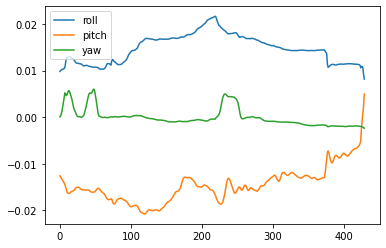

In [3]:
attitude.cumsum()
attitude.plot()

<AxesSubplot:>

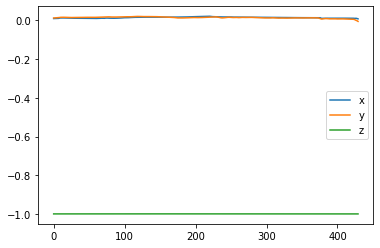

In [4]:
gravity.cumsum()
gravity.plot()

<AxesSubplot:>

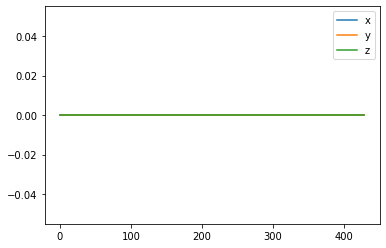

In [5]:
magnetic_field.cumsum()
magnetic_field.plot()

<AxesSubplot:>

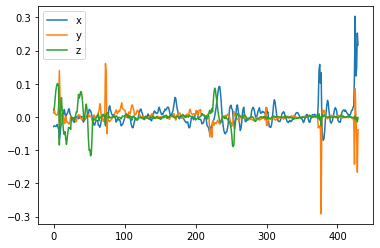

In [6]:
rotational_rate.cumsum()
rotational_rate.plot()

<AxesSubplot:>

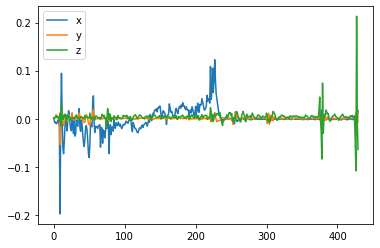

In [7]:
user_acceleration.cumsum()
user_acceleration.plot()

# Noise of processed IMU data

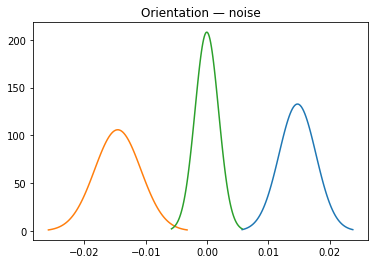

In [8]:
# Attitude
plot_distribution(
    data=[attitude['roll'], attitude['pitch'], attitude['yaw']],
    key=["roll", 'pitch', 'yaw'], 
    plot_title="Orientation — noise"
)


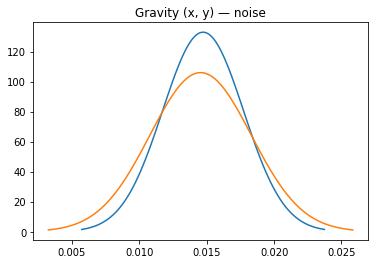

In [9]:
# Gravity (x, y)
plot_distribution(
    data=[gravity['x'], gravity['y']],
    key=["x", 'y', 'z'],
    plot_title="Gravity (x, y) — noise"
)


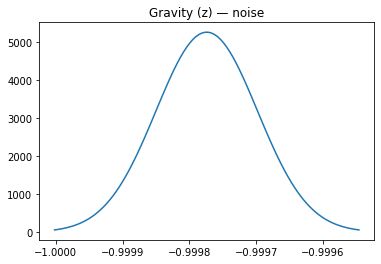

In [10]:
# Gravity (z)
plot_distribution(
    data=[gravity['z']],
    key=['z'],
    plot_title="Gravity (z) — noise"
)

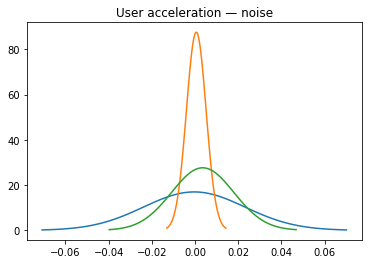

In [11]:
# User acceleration (x, y, z)
plot_distribution(
    data=[user_acceleration['x'], user_acceleration['y'], user_acceleration['z']],
    key=["x", 'y', 'z'], 
    plot_title="User acceleration — noise", 
    path_to_csv_file=path_to_imu_data_processed+"user_acceleration_noise.csv"
)



# GPS data vs time 


In [12]:
def meters_to_coordinate_degrees(m):
    """
    A quick estimate of meters in terms of degrees. 
    
    return: new lat/long coordinates
    """

    lat = m / 111111.0
    long = m / (111111.0 * np.cos(lat))

    return lat/2.0, long/2.0



Latitude:	 33.9146326901707
Longitude:	 18.41902166606711
Altitude:	 22.84536361694336
Coordinate uncertainty:	 14.26776722501695
Height uncertainty:	 3.0


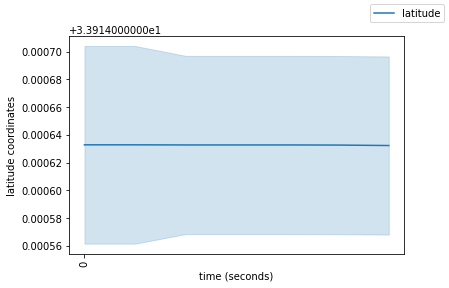

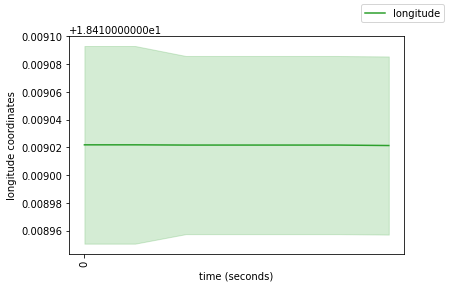

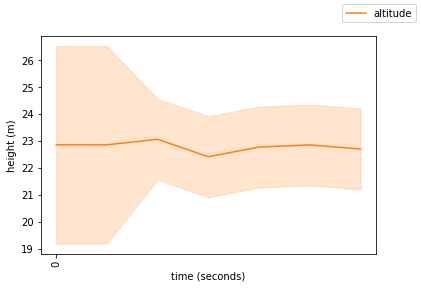

In [13]:

time = gps_data['timestamp'].values
latitude = gps_data['latitude'].values
longitude = gps_data['longitude'].values
altitude = gps_data['altitude'].values
horizontalAccuracy = gps_data['horizontalAccuracy'].values
verticalAccuracy = gps_data['verticalAccuracy'].values

print("Latitude:\t", np.median(latitude))
print("Longitude:\t", np.median(longitude))
print("Altitude:\t", np.median(altitude))
print("Coordinate uncertainty:\t", np.median(horizontalAccuracy))
print("Height uncertainty:\t", np.median(verticalAccuracy))

newTime = []
for i in range(len(time)):
    if i % 10 == 0:
        newTime.append(i)

latitude_accuracy = []
longitude_accuracy = []
for h in horizontalAccuracy:
    lat, long = meters_to_coordinate_degrees(h)
    latitude_accuracy.append(lat)
    longitude_accuracy.append(long)

altitude_accuracy = []
for v in verticalAccuracy:
    altitude_accuracy.append(v/2.0)

# LATITUDE
fig,ax=plt.subplots()
ax.plot(time, latitude, color="tab:blue")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("latitude coordinates")
plt.fill_between(time, latitude - latitude_accuracy, latitude + latitude_accuracy, color='tab:blue', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["latitude"])

# LONGITUDE
fig,ax=plt.subplots()
ax.plot(time, longitude, color="tab:green")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("longitude coordinates")
plt.fill_between(time, longitude - longitude_accuracy, longitude + longitude_accuracy, color='tab:green', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["longitude"])

# Altitude 
fig,ax=plt.subplots()
ax.plot(time, altitude, color="tab:orange")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("height (m)")
plt.fill_between(time, altitude - altitude_accuracy, altitude + altitude_accuracy, color='tab:orange', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["altitude"])






# TODO: Plot position estimate in 3D space: